<a href="https://colab.research.google.com/github/Dean-Clark27/CSE337_Lab3_TD_Learning/blob/main/Dean_Clark_CSE337_lab3_TD_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Lab 3: Temporal Difference Learning

In this lab, we will practice TD Learning methods, including SARSA and Q-Learning. Both are tabular methods that work on finite MDP.

We will solve the cliff problem: https://gymnasium.farama.org/environments/toy_text/cliff_walking/#is_slippy


The following code runs in colab, if you want to see the animation, you have to run it using python locally on your computer and replacing render_mode="ansi" for render_mode="human".

The follwing code runs the cliff problem using a random policy.

In [2]:
# Dean Clark
# CSE 337 with Professor Saldana
# dmc227@lehigh.edu 800049284
# 09/12/2025

import gymnasium as gym

'''
0: Move up
1: Move right
2: Move down
3: Move left
'''

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 5      # number of episodes to run
max_steps = 100     # safety cap

for episode in range(n_episodes):
    # from documentation:
    # As cliff walking is not stochastic, the transition probability returned always 1.0.
    state, info = env.reset()
    done = False
    total_reward = 0

    for step in range(max_steps):
        # Random policy: sample an action uniformly
        action = env.action_space.sample()

        next_state, reward, terminated, truncated, info = env.step(action)
        total_reward += reward
        state = next_state

        if terminated or truncated:
            break

    print(f"Episode {episode+1}: total reward = {total_reward}")

env.close()

Episode 1: total reward = -397
Episode 2: total reward = -496
Episode 3: total reward = -694
Episode 4: total reward = -793
Episode 5: total reward = -1090


## Exercise 1: SARSA
Implement SARSA to solve the cliff problem above. Recommendations:



1. Define your Q table, as a matrix of [number of states] x [number of actions]
2. Greedy policy: Write a function that receives a state, the Q table, and returns the best action (the one with the maximum Q value).
3. $\epsilon$-greedy: Write a function that chooses the greedy policy with $\epsilon$ probality, and chooses a random actions with 1-$\epsilon$ probability.
4. Implement the SARSA algorithm based on the pseudo-code



In [64]:

import gymnasium as gym
import numpy as np

# Create the environment
env = gym.make("CliffWalking-v1", render_mode="ansi")

n_episodes = 1000      # number of episodes to run
max_steps = 100        # safety cap

# Q-learning parameters
learning_rate = 0.1
epsilon = 0.01
discount_factor = 0.99
n_actions = env.action_space.n
n_states = env.observation_space.n
Q = np.zeros((n_states, n_actions))



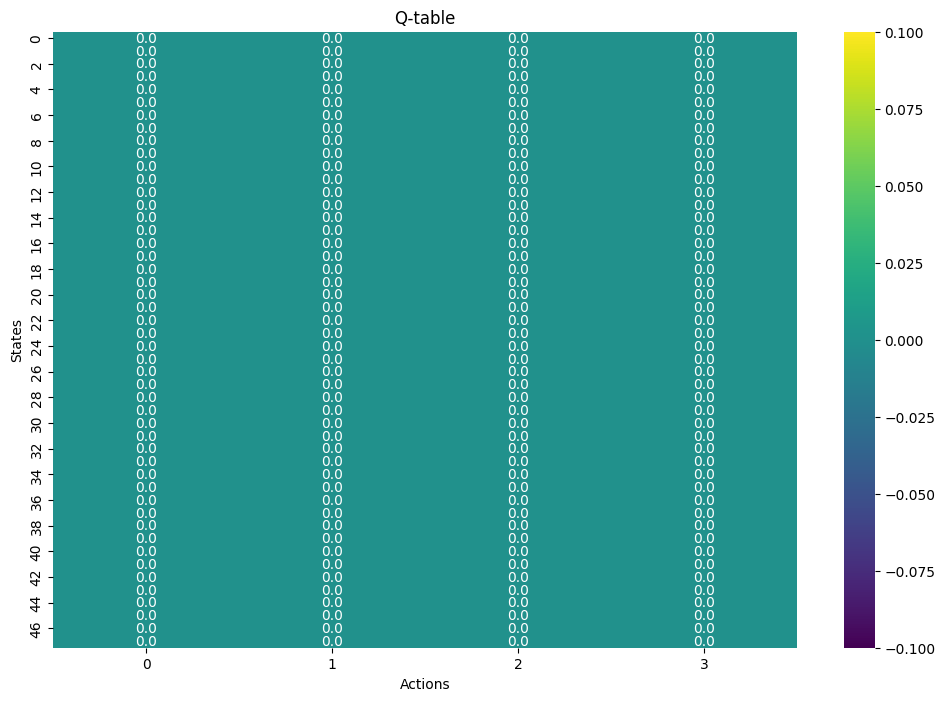

In [65]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_Q(Q):
  plt.figure(figsize=(12, 8))
  sns.heatmap(Q, annot=True, fmt=".1f", cmap="viridis")
  plt.xlabel("Actions")
  plt.ylabel("States")
  plt.title("Q-table")
  plt.show()

plot_Q(Q)

In [69]:
rng = np.random.default_rng()

def greedy(state, q_table):
  return np.argmax(q_table[state])


def epsilon_greedy(state, epsilon, q_table):
  if rng.random() <= epsilon:
    return env.action_space.sample()
  else:
    return np.argmax(q_table[state])

def run_sarsa(env, n_episodes, learning_rate, discount_factor, epsilon):
  Q = np.zeros((n_states, n_actions))
  episode_rewards = []

  for i in range(n_episodes):
    s, prob = env.reset()
    #print("First state for episode", i+1, ": ", s)

    a = epsilon_greedy(s, epsilon, Q)
    #print("First action: ", a)

    step_number = 1
    total_reward = 0

    #
    while s != 47 and step_number < max_steps:
      s_prime, reward, done, _, _ = env.step(a) # Get the reward
      #print("Next state: ", s_prime)

      total_reward += reward
      a_prime = epsilon_greedy(s_prime, epsilon, Q)
      #print("Next action: ", a_prime)

      Q[s][a] = Q[s][a] + learning_rate * (reward + discount_factor * Q[s_prime][a_prime] - Q[s][a])

      s = s_prime
      a = a_prime
      step_number += 1
    episode_rewards.append(total_reward)
  return episode_rewards, Q

sarsa_rewards, sarsa_Q = run_sarsa(env, n_episodes, learning_rate, discount_factor, epsilon)

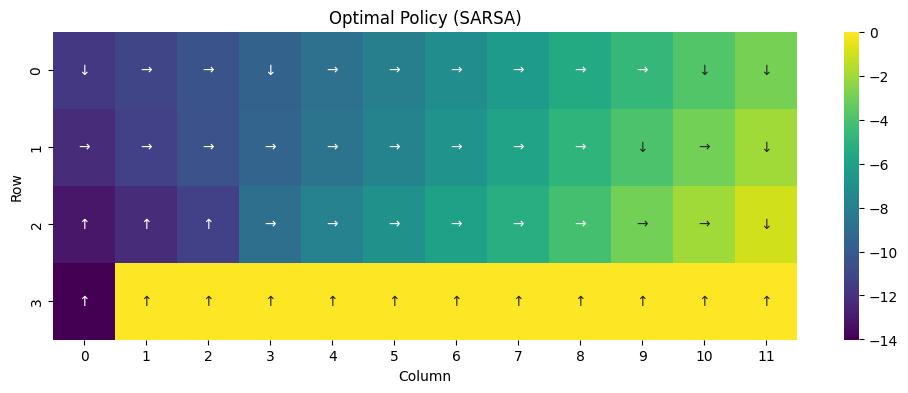

In [70]:
def plot_policy(Q, title="SARSA"):
  # Reshape Q table to a 4x12 grid
  Q_grid = Q.reshape((4, 12, n_actions))

  # Get the optimal action for each state and its corresponding Q-value
  optimal_action = np.argmax(Q_grid, axis=2)
  optimal_policy_Q = np.max(Q_grid, axis=2)


  # Define arrow mapping based on action space (0: up, 1: right, 2: down, 3: left)
  action_arrows = {0: "↑", 1: "→", 2: "↓", 3: "←"}
  optimal_policy_arrows = np.vectorize(action_arrows.get)(optimal_action)


  plt.figure(figsize=(12, 4))
  sns.heatmap(optimal_policy_Q, annot=optimal_policy_arrows, fmt="", cmap="viridis", cbar=True) # Add color bar back
  plt.xlabel("Column")
  plt.ylabel("Row")
  plt.title("Optimal Policy (SARSA)")
  plt.show()
plot_policy(sarsa_Q)

## Exercise 2.1: Q: Learning
Implement Q-learning method to solve the cliff problem

In [73]:
def run_qlearning(env, n_episodes, learning_rate, discount_factor, epsilon):
  Q = np.zeros((n_states, n_actions))
  episode_rewards = []

  for i in range(n_episodes):
    s, prob = env.reset()
    total_reward = 0
    step_number = 1

    while s != 47 and step_number < max_steps:
      a = epsilon_greedy(s, epsilon, Q)
      s_prime, reward, done, _, _ = env.step(a)
      total_reward += reward

      Q[s][a] = Q[s][a] + learning_rate * (reward + discount_factor * np.max(Q[s_prime]) - Q[s][a])

      s = s_prime
      step_number += 1
    episode_rewards.append(total_reward)
  return episode_rewards, Q

qlearn_rewards, qlearn_Q = run_qlearning(env, n_episodes, learning_rate, discount_factor, epsilon)

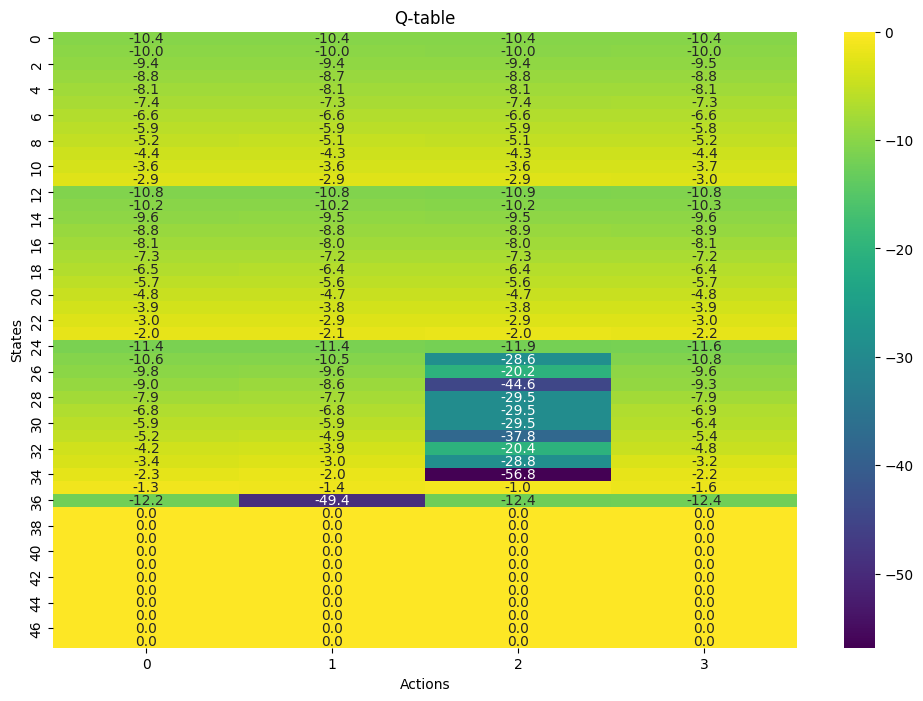

In [75]:
plot_Q(qlearn_Q)

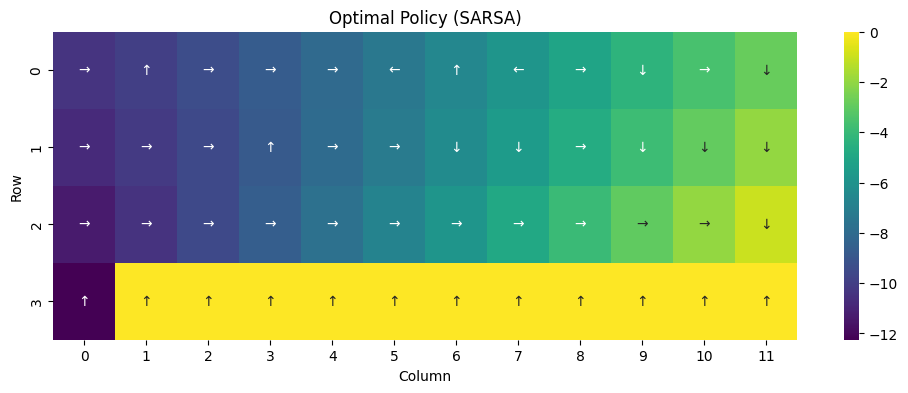

In [77]:
plot_policy(qlearn_Q, "Q-Learning")

## Exercise 2.2: SARSA vs Q-learning
 1. Compare the results betwen SARSA and Q-Learning (plot a graph of the sum of rewards duing each episode for each algorithm).
 2. Include the is_slippery=True parameter. Compare again, which one is better?


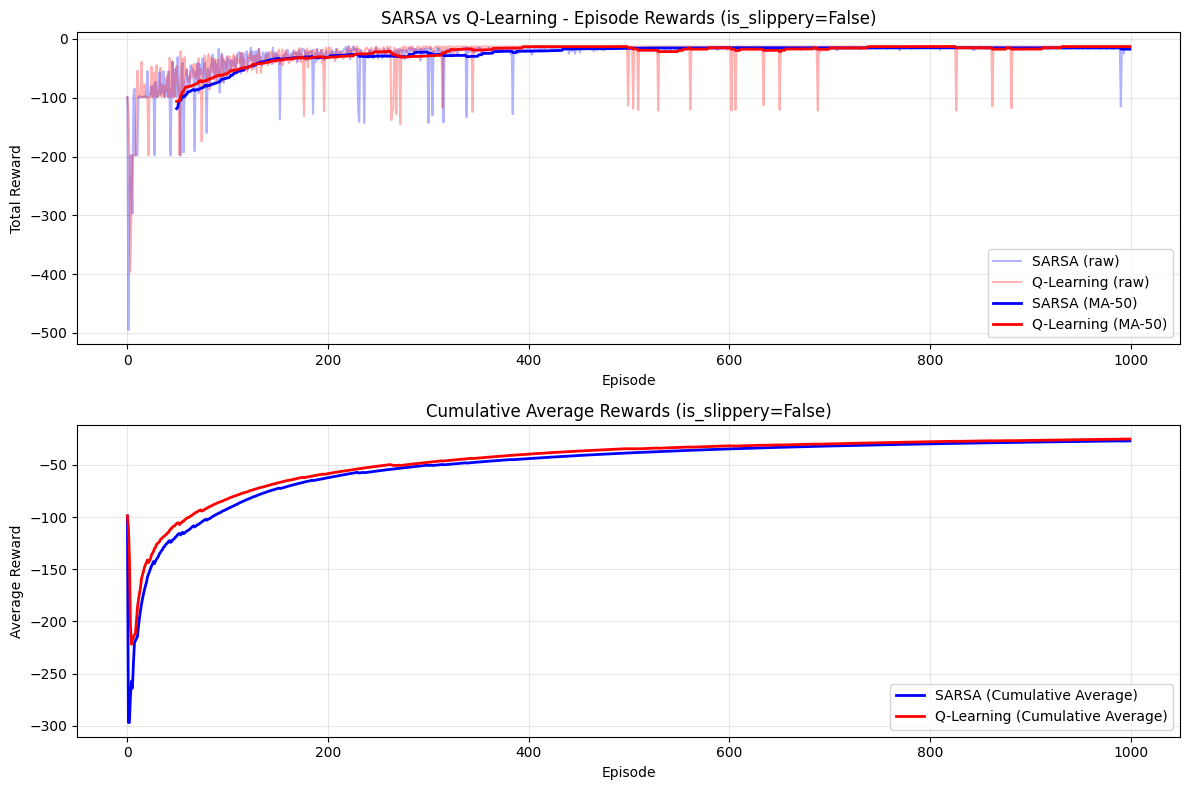


=== Results (is_slippery=False) ===
SARSA - Final 100 episodes average: -16.370
Q-Learning - Final 100 episodes average: -13.110
SARSA - Overall average: -27.024
Q-Learning - Overall average: -25.179


In [85]:
def plot_comparison(sarsa_rewards, qlearn_rewards, title_suffix=""):
    """Plot comparison between SARSA and Q-learning"""
    window = min(50, len(sarsa_rewards) // 4, len(qlearn_rewards) // 4)  # Adaptive window size

    if len(sarsa_rewards) >= window and len(qlearn_rewards) >= window:
        sarsa_ma = np.convolve(sarsa_rewards, np.ones(window)/window, mode='valid')
        qlearn_ma = np.convolve(qlearn_rewards, np.ones(window)/window, mode='valid')
    else:
        # If arrays too short for moving average, just use the original arrays
        sarsa_ma = sarsa_rewards
        qlearn_ma = qlearn_rewards

    plt.figure(figsize=(12, 8))

    # Raw rewards (lighter colors)
    plt.subplot(2, 1, 1)
    plt.plot(sarsa_rewards, alpha=0.3, color='blue', label='SARSA (raw)')
    plt.plot(qlearn_rewards, alpha=0.3, color='red', label='Q-Learning (raw)')

    # Only plot moving average if we have enough data points
    if len(sarsa_ma) > 1 and len(qlearn_ma) > 1:
        if len(sarsa_ma) == len(sarsa_rewards):  # No convolution applied
            plt.plot(sarsa_ma, color='blue', linewidth=2, label='SARSA (smoothed)')
            plt.plot(qlearn_ma, color='red', linewidth=2, label='Q-Learning (smoothed)')
        else:  # Convolution applied
            plt.plot(range(window-1, len(sarsa_rewards)), sarsa_ma, color='blue', linewidth=2, label=f'SARSA (MA-{window})')
            plt.plot(range(window-1, len(qlearn_rewards)), qlearn_ma, color='red', linewidth=2, label=f'Q-Learning (MA-{window})')

    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.title(f'SARSA vs Q-Learning - Episode Rewards{title_suffix}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Cumulative average rewards
    plt.subplot(2, 1, 2)
    sarsa_cumavg = np.cumsum(sarsa_rewards) / np.arange(1, len(sarsa_rewards) + 1)
    qlearn_cumavg = np.cumsum(qlearn_rewards) / np.arange(1, len(qlearn_rewards) + 1)

    plt.plot(sarsa_cumavg, color='blue', linewidth=2, label='SARSA (Cumulative Average)')
    plt.plot(qlearn_cumavg, color='red', linewidth=2, label='Q-Learning (Cumulative Average)')
    plt.xlabel('Episode')
    plt.ylabel('Average Reward')
    plt.title(f'Cumulative Average Rewards{title_suffix}')
    plt.legend()
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    # Print final statistics
    print(f"\n=== Results{title_suffix} ===")
    print(f"SARSA - Final 100 episodes average: {np.mean(sarsa_rewards[-100:]):.3f}")
    print(f"Q-Learning - Final 100 episodes average: {np.mean(qlearn_rewards[-100:]):.3f}")
    print(f"SARSA - Overall average: {np.mean(sarsa_rewards):.3f}")
    print(f"Q-Learning - Overall average: {np.mean(qlearn_rewards):.3f}")

sarsa_rewards, sarsa_Q = run_sarsa(env, n_episodes, learning_rate, discount_factor, epsilon)
qlearn_rewards, qlearn_Q = run_qlearning(env, n_episodes, learning_rate, discount_factor, epsilon)
plot_comparison(sarsa_rewards, qlearn_rewards, " (is_slippery=False)")

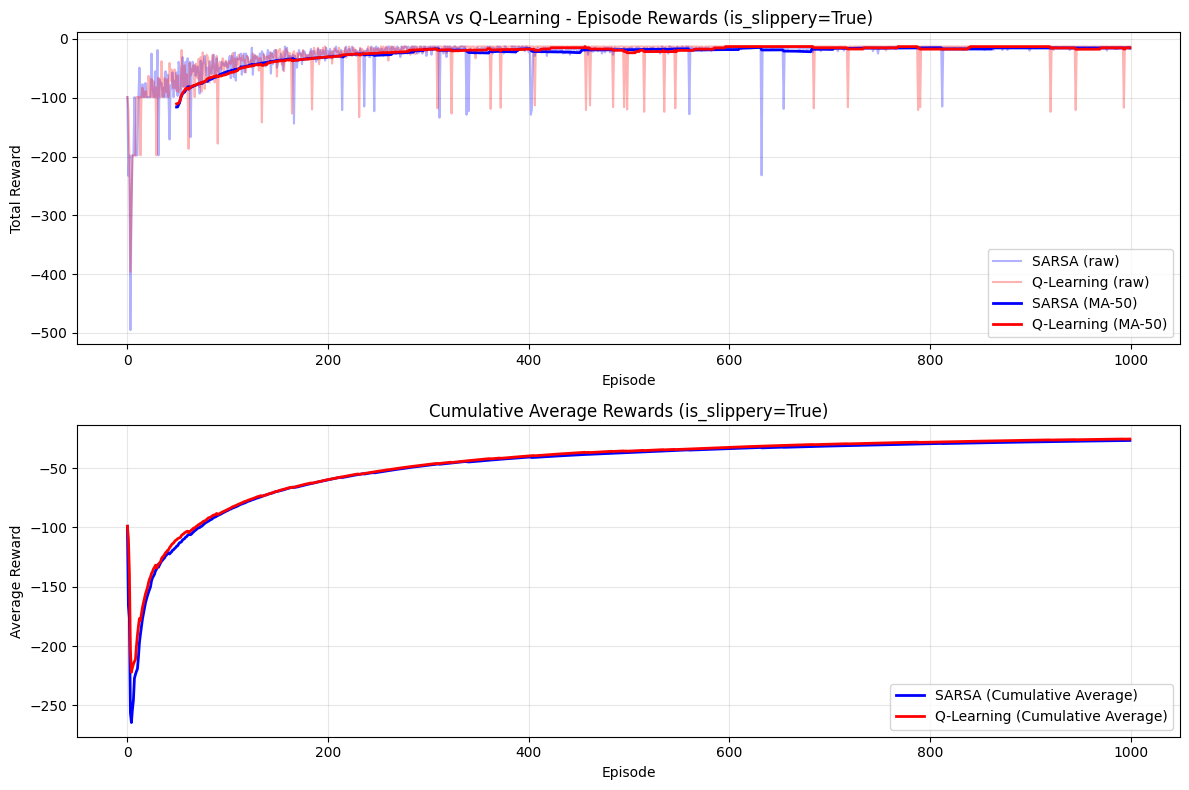


=== Results (is_slippery=True) ===
SARSA - Final 100 episodes average: -15.350
Q-Learning - Final 100 episodes average: -16.420
SARSA - Overall average: -26.725
Q-Learning - Overall average: -25.508


In [83]:
env_slippery = gym.make("CliffWalking-v1", render_mode="ansi", is_slippery=True)

sarsa_rewards_slippery, sarsa_Q_slippery = run_sarsa(env, n_episodes, learning_rate, discount_factor, epsilon)
qlearn_rewards_slippery, qlearn_Q_slippery = run_qlearning(env, n_episodes, learning_rate, discount_factor, epsilon)
plot_comparison(sarsa_rewards_slippery, qlearn_rewards_slippery, " (is_slippery=True)")

Overall, in the is_slippery=False environment, Q-learning in the red performs slightly better than SARSA. It reaches a slightly taller plateau and both converge around 150-200 episodes. Q-learning makes sense theoretically to outperform SARSA as well, because it has a greedy/aggressive aspect to it with the max in the updating of the Q table.

The same clear winner of Q-learning is seen in the is_slippery=True situation. Again, we see a similar convergence episode, but larger gap between the total rewards here, and Q-learning stabilizes earlier. Here, Q-learning is optimistic in choosing the best possible next action to learn a more optimal policy. This also handles uncertainty/a stochastic environment better than SARSA, which is more affected by a weaker exploration and is risk-averse because of the epsilon-greedy exploration with no check in the updating of the Q table.

# Exercise 3 (graduate students): 8x8 grid problem
Solve the 8x8 grid problem from the previous lab. You can use SARSA or Q-learning. How many episodes does it need to learn the optimal policy?
